## Advertising Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='sales'>

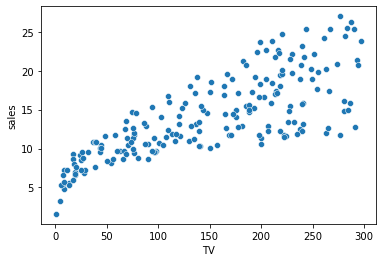

In [7]:
sns.scatterplot(x='TV',y='sales',data=df)

### The sales are increasing with tv

<AxesSubplot:xlabel='radio', ylabel='sales'>

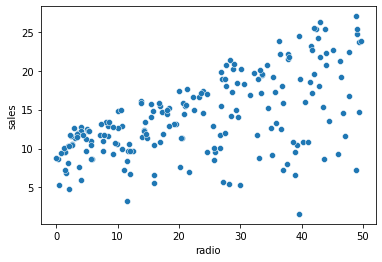

In [8]:
sns.scatterplot(x='radio',y='sales',data=df)

### Some part of sales are increasing with radio

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

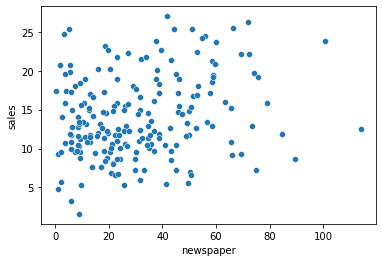

In [9]:
sns.scatterplot(x='newspaper',y='sales',data=df)

### newspaper and sales are almost independent to each other

<AxesSubplot:xlabel='TV', ylabel='Density'>

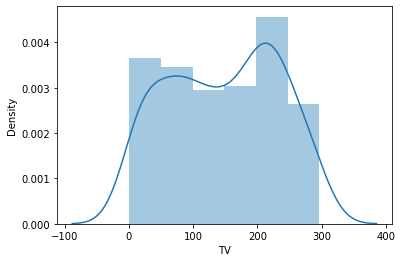

In [10]:
sns.distplot(df['TV'])

### TV is not normally distributed

<AxesSubplot:xlabel='radio', ylabel='Density'>

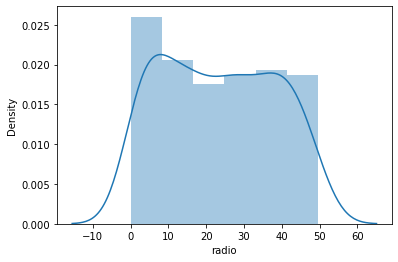

In [11]:
sns.distplot(df['radio'])

### radio is not normally distributed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

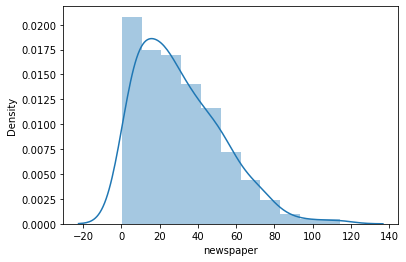

In [12]:
sns.distplot(df['newspaper'])

### newspaper is having right skewness

<AxesSubplot:xlabel='TV'>

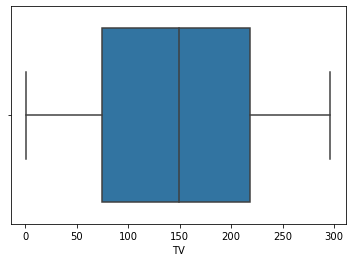

In [13]:
sns.boxplot(df['TV'])

### There are no outliers in TV column

<AxesSubplot:xlabel='radio'>

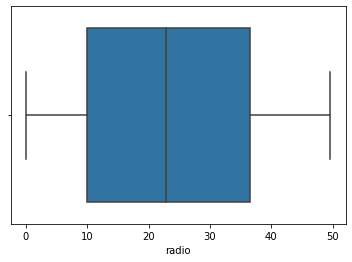

In [14]:
sns.boxplot(df['radio'])

### There are no outliers in radio column

<AxesSubplot:xlabel='newspaper'>

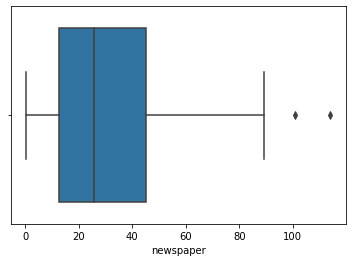

In [15]:
sns.boxplot(df['newspaper'])

### There are 2 outliers in newspaper column

In [16]:
cor=df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

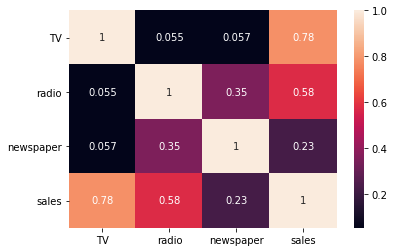

In [17]:
sns.heatmap(cor,annot=True)

### There is very less correlation between sales and newspaper, so we can drop the newspaper column.
### There is no multi-collinearity between the columns.

In [18]:
df.drop(['newspaper'],axis=1,inplace=True)

### Since, the newspaper column is removed, there are no outliers present in the data.

## Skewness

In [19]:
df.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

### There is no skewness in the data

In [20]:
x=df.drop(['sales'],axis=1)
y=df['sales']

## Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,TV,radio
0,0.969852,0.981522
1,-1.197376,1.082808
2,-1.516155,1.528463
3,0.052050,1.217855
4,0.394182,-0.841614


## Choosing Random State Value

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.9534698621582527 ran state= 151


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

### Lasso

In [25]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'random_state': 8, 'selection': 'random'}


In [26]:
ls = Lasso(alpha=0.01,fit_intercept=True,random_state=8,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

95.36224427408513

### Ridge

In [27]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'max_iter': 1, 'normalize': False}


In [28]:
rd = Ridge(alpha=1,copy_X=True,max_iter=1,normalize=False)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

95.37956254058147

### Linear Regression

In [29]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [30]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

95.34698621582528

### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,11)),'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 'auto', 'splitter': 'best'}


In [32]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=9,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

97.09818029233267

## Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=3).mean())*100
cv2=(cross_val_score(rd,x,y,cv=3).mean())*100
cv3=(cross_val_score(lr,x,y,cv=3).mean())*100
cv4=(cross_val_score(dtr,x,y,cv=3).mean())*100
print(cv1,cv2,cv3,cv4)

89.31482752107075 89.31474089049952 89.31635501481657 95.95506947116506


In [34]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

6.0474167530143745 6.064821650081953 6.030631201008717 1.1431108211676104


### We can choose Decision Tree Regressor as our model, since its r2 score and cv_score are almost similar.

## Model Selection

In [36]:
fin_sales=DecisionTreeRegressor(criterion='friedman_mse',max_depth=9,max_features='auto',splitter='best')
fin_sales.fit(x_train,y_train)
pred=fin_sales.predict(x_test)
dtr_r2=r2_score(y_test,pred)
dtr_r2*100

97.20915783436642

## Saving the Model

In [37]:
import joblib
joblib.dump(fin_sales,'Final_sales_mod.pkl')

['Final_sales_mod.pkl']